# chapter 7. Clustering

## Mean Shift

**평균 이동은 K-Means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행**한다. <br>
K-Means이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다. <br>
**평균 이동 군집화**는 **데이터의 분포도를 이용해 군집 중심점을 찾는다.** <br>
**군집 중심점**은 **데이터 포인터가 모여있는 곳이라는 생각에서 착안**한 것이며, 이를 위해 **확률 밀도 함수**를 이용한다. <br>
가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE를 이용한다. <br>

**KDE(Kernel Density Estimation)** 은 **커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법**이다. <br>
**확률 밀도 함수 PDF**는 **확률 변수의 분포를 나타내는 함수**로, 확률 밀도 함수를 알면 특정 변수가 어떤 값을 가지게 될지 알게되므로 이를 통해 변수의 특성, 확률 분포 등 변수의 많은 요소를 알 수 있다. <br>
KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로 가우시안 분포 함수가 사용된다. <br>

**대역폭 h**는 KDE 형태를 부드러운 형태로 평활화하는데 적용되며, 이를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다. <br>
**작은 h값은 과적합하기 쉽고, 큰 h값은 과소적합하기 쉽다.** <br>
일반저긍로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다. <br>
또한 군집의 갯수를 지정하지 않으며 오직 대역폭의 크기에 따라 군집화를 수행한다. <br>

사이킷런은 평균 이동 군집화를 위해 **MeanShift Class**를 제공하며, 가장 중요한 초기화 파라미터는 **bandwidth**로 이는 KDE 대역폭 h와 동일하다. <br>
최적의 대역폭 계산을 위해 **estimate_bandwidth()** 함수를 제공한다. 

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/2021813637.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x);


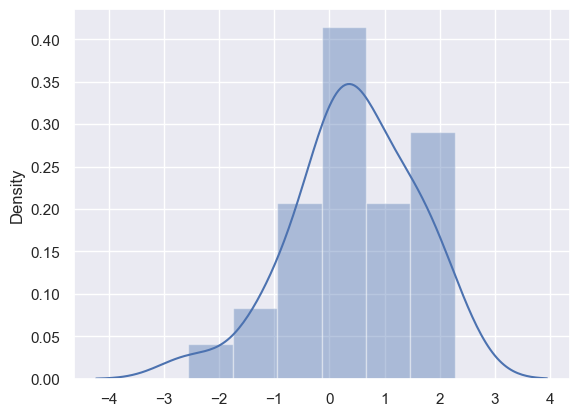

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)

np.random.seed(0)
x = np.random.normal(0, 1, size = 30)
print(x)
sns.distplot(x);

/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/228759929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug = True)


<Axes: ylabel='Density'>

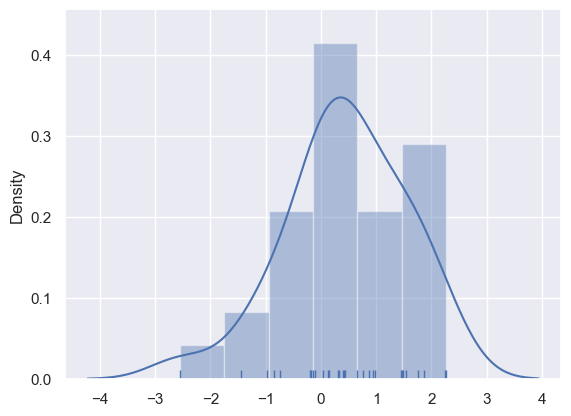

In [5]:
sns.distplot(x, rug = True)

/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/872587030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde = False, rug = True)


<Axes: >

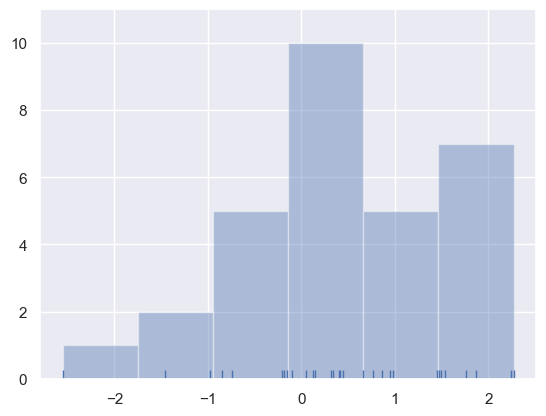

In [6]:
sns.distplot(x, kde = False, rug = True)

/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/2383768140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist = False, rug = True);


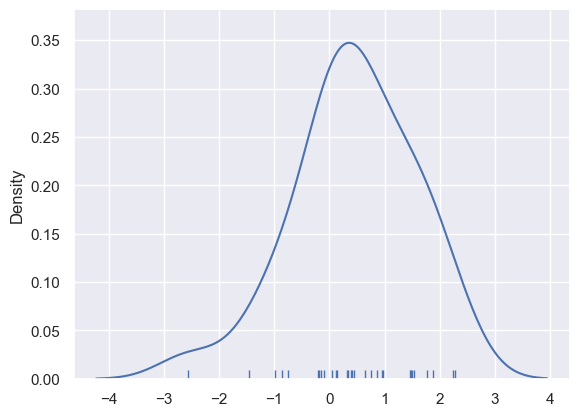

In [7]:
sns.distplot(x, hist = False, rug = True);

**개별 관측데이터에 대해 가우시안 커널 함수를 적용**

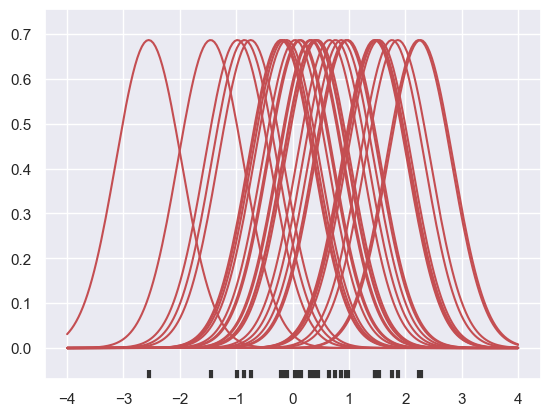

In [8]:
from scipy import stats

# x = np.random.normal(0, 1, size = 30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color = "r")

sns.rugplot(x, color = ".2", linewidth = 3);

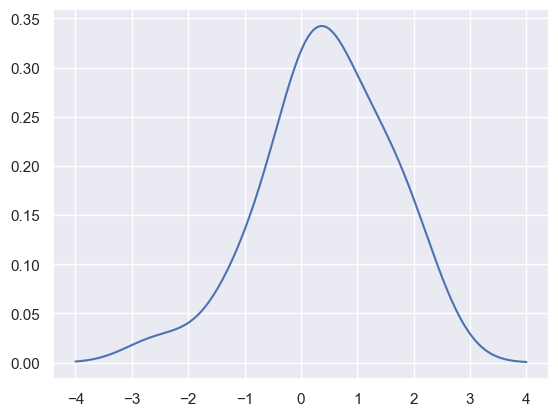

In [9]:
from scipy.integrate import trapz
density = np.sum(kernels, axis = 0)
density /= trapz(density, support)
plt.plot(support, density);

**seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있다.**

/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/2803990002.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade = True);


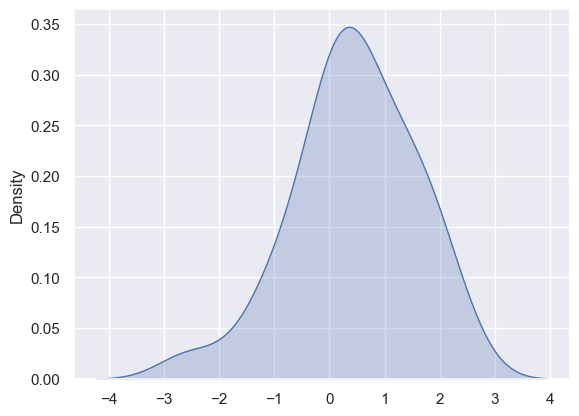

In [10]:
sns.kdeplot(x, shade = True);

**bandwidth에 따른 KDE 변화**

/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/625293548.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw = .2, label = "bw: 0.2")
/var/folders/pt/2kmssbtj0hj5gmbycrc6vdfr0000gn/T/ipykernel_17356/625293548.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw = 2, label = "bw: 2")


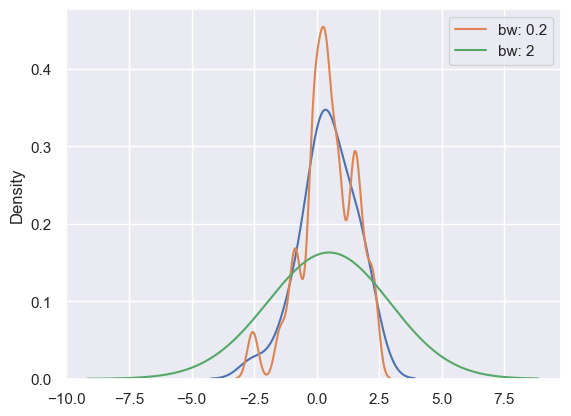

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw = .2, label = "bw: 0.2")
sns.kdeplot(x, bw = 2, label = "bw: 2")
plt.legend();

**사이킷런을 이용한 Mean Shift**

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행한다.

In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, 
                  cluster_std = 0.8, random_state = 0)

meanshift= MeanShift(bandwidth = 0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


**커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재수행**

In [15]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [16]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile = 0.25)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.689


In [19]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile = 0.25)

# MeanShift 클래스의 생성자를 호출할 때 bandwidth 매개변수를 명시적으로 지정
meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels)) 

cluster labels 유형: [0 1 2]


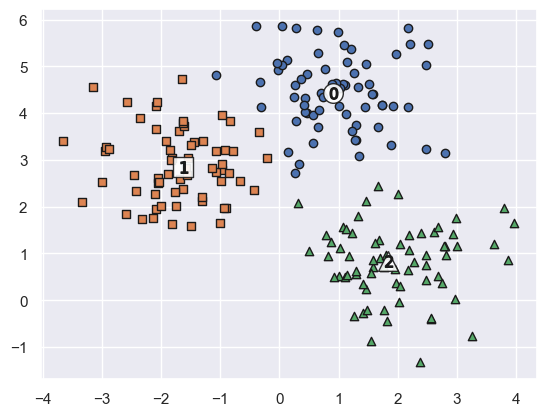

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', 
                marker = markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white',
                edgecolor = 'k', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', 
                marker = '$%d$' % label)
    
plt.show()

In [22]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: count, dtype: int64
